<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Actividades_clase/Actividad_08_diferenciacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Calculo de derivadas


## Diferencias finitas de primer orden
El método de diferencias finitas aproxima derivadas numéricamente.


- Aproximación de primer orden hacia adelante:

\begin{equation}
      f'(x_k) \approx \frac{f(x_{k+1}) - f(x_k)}{h}
\end{equation}

- Aproximación de primer orden hacia atrás:

\begin{equation}
      f'(x_k) \approx \frac{f(x_k) - f(x_{k-1})}{h}
\end{equation}



\begin{equation}
\text{Error} = \frac{h}{2} f''(\xi)
\end{equation}

donde $x$ está entre $x_k$ y $x_{k+1}$.
## Diferencias finitas de segundo orden, diferencia central


Utilizando la fórmula de Taylor de segundo grado:
\begin{equation}
f(x) = f(x_k) + f'(x_k)(x - x_k) + \frac{f''(x_k)}{2}(x - x_k)^2 + R_2
\end{equation}

Evaluando en $x = x_{k+1}$ y $x = x_{k-1}$:
\begin{equation}
f(x_{k+1}) = f(x_k) + f'(x_k)h + \frac{f''(x_k)}{2}h^2 + O(h^3)
\end{equation}

\begin{equation}
f(x_{k-1}) = f(x_k) - f'(x_k)h + \frac{f''(x_k)}{2}h^2 + O(h^3)
\end{equation}

Restando estas ecuaciones y despejando $f'(x_k)$:

\begin{equation}
f'(x_k) \approx \frac{f(x_{k+1}) - f(x_{k-1})}{2h}
\end{equation}


El error de truncamiento es:
\begin{equation}
\text{Error} = \frac{h^2}{6} f'''(\xi)
\end{equation}

donde $\xi$ está entre $x_{k-1}$ y $x_{k+1}$.


# Actividad

1. Construya una función que permita calcular la derivada de una funcion empleando el metodo de diferencias centrales para aproximar el cálculo de la derivada con la función:

$y=e^{x^2}\sin x $

Compruebe  su solución empleando la derivada de sympy.

Analice que  pasa con la derivada cuando varia el valor de h.


In [2]:
import numpy as  np
import matplotlib.pyplot as plt
import sympy as sp
import pandas as pd
from scipy import constants

In [ ]:
z1 = sp.symbols("x")
f_y = lambda x: np.exp(x**2) * np.sin(x)
f_s = lambda z: sp.exp(z**2) * sp.sin(z)

In [ ]:
def dif_central(x,f_y,h):
  """Diferecncias centrales para el calculo de la la derivada
  Input:
    func: Funciòn f(x)
    x: Punto o conjuntos de puntos a calcular en f(x)
    h: Diferencias dx
  Output: Derivada
  """

  derivada = (f_y(x+h) * f_y(x-h))/(2*h)
  return derivada

In [ ]:
def dif_simbolica(func,z1,orden):
  df = sp.diff(func(z1),z1,orden)
  f1 = sp.lambdify(z1,df,"numpy")
  return f1

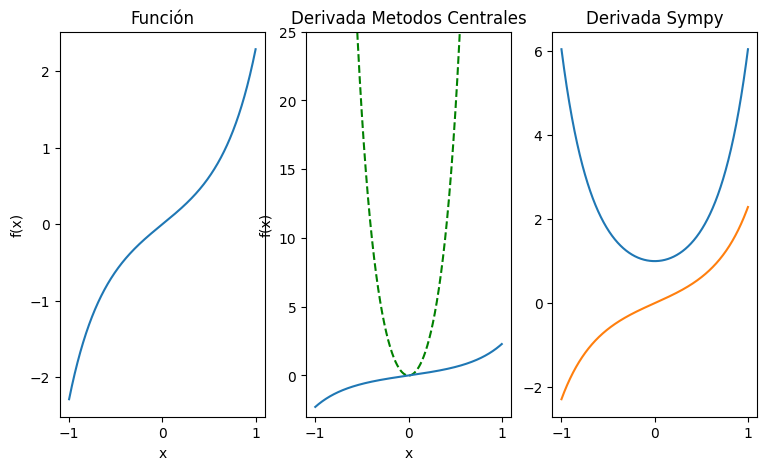

In [ ]:
x = np.linspace(-1,1,1000) # Elegi este rango debido al comportamiento de la funciòn
y = f_y(x)
derivada = dif_central(x,f_y,1E-2)
d1 = dif_simbolica(f_s,z1,1)(x)
fig,axs = plt.subplots(1,3, figsize=(9,5))
ax = axs.flatten()
ax[0].plot(x,y)
ax[0].set_title("Función")
ax[0].set_ylabel("f(x)")
ax[0].set_xlabel("x")
ax[1].plot(x,derivada, "g--")
ax[1].plot(x,y)
ax[1].set_title("Derivada Metodos Centrales")
ax[1].set_ylabel("f(x)")
ax[1].set_ylim(-3,25)
ax[1].set_xlabel("x")
ax[2].plot(x,d1)
ax[2].set_title("Derivada Sympy")
ax[2].plot(x,y)
plt.show()

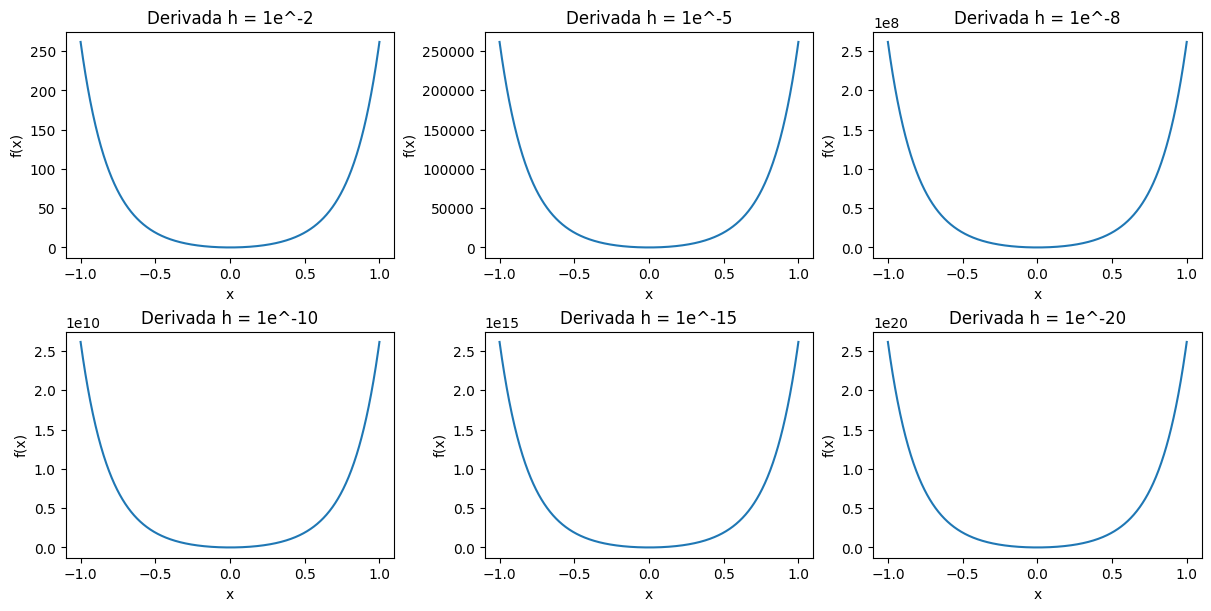

In [ ]:
N = np.array([2,5,8,10,15,20])
fig, axs = plt.subplots(2,3, figsize=(12, 6 ),constrained_layout=True)
for i, n in enumerate(N):
  x = np.linspace(-1,1,1000)
  ax = axs.flatten()
  h = 1*10**(-n.astype(float))
  derivada = dif_central(x,f_y,h)
  ax[i].plot(x,derivada)
  ax[i].set_title(f"Derivada h = 1e^-{n}")
  ax[i].set_ylabel("f(x)")
  ax[i].set_xlabel("x")

Como se observa en las graficas, conforme h dismunuye ($1*10^-2 = 0.01$) la valores laterales en la parabola son cada vez más grandes, en otras palabras aumentan su concavidad ($a>0$)

2. Construya una función que permita calcular el metodo de diferencias centrales derivada para los siguientes puntos experimentales, emplee una pandas.

In [ ]:
url = "https://raw.githubusercontent.com/hernansalinas/autogradesMetodosComputacionales/main/Dataset/datos_pendulo.csv"
df = pd.read_csv(url)
df.head()
df.drop("Unnamed: 0", axis = 1, inplace= True)

In [ ]:
df.head()

,Tiempo[ms],AnguloDeg,AnguloRad
0,9,-30.710388,-0.535997
1,42,-30.017673,-0.523907
2,75,-28.762547,-0.502001
3,108,-26.507523,-0.462644
4,142,-24.611229,-0.429547


In [ ]:
df.tail()

,Tiempo[ms],AnguloDeg,AnguloRad
2842,94709,4.937576,0.086177
2843,94743,6.479851,0.113095
2844,94776,7.940689,0.138591
2845,94809,9.318092,0.162631
2846,94843,10.637817,0.185665


In [ ]:
def dif_central2(y,h):
  derivada = np.array([])
  for i in range(1,len(y)-1):
    diff = y[i+1] - y[i-1] / 2*h
    derivada = np.append(derivada,diff)
  return derivada

In [ ]:
pdiff = dif_central2(df['AnguloRad'],2)
len(pdiff)

2845

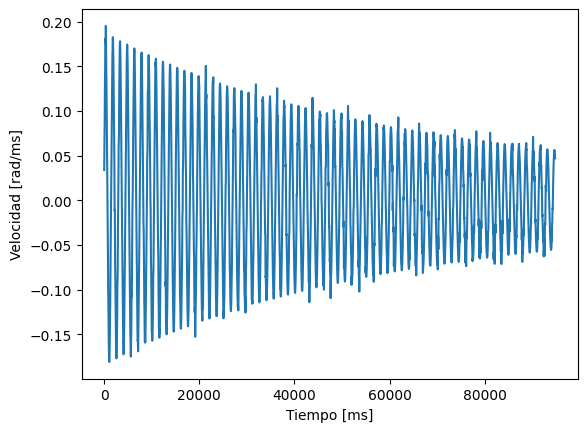

In [ ]:
plt.plot(df["Tiempo[ms]"][:-2], pdiff)
plt.xlabel("Tiempo [ms]")
plt.ylabel("Velocidad [rad/ms]")
plt.show()

3. El potencial eléctrico de un anillo de radio R, en la parte superior z del anillo viene dado por:


\begin{equation}
V = \frac{kq_{tot}z}{\sqrt{z^2+R^2}}
\end{equation}

Calcule el campo eléctrico para z>0 y R=0.1mm. Reescale el problema en unidades de $kq_{top}$ empleando:

1. La librearia sympy.

2. Calcular el campo en el punto  $z = 0.1mm$ empleando el metodo np.grad

3. Calcular el campo para diferentes valores de z con z>0,,  empleando np.grad Construya un gráfico de E vs z.


In [3]:
z = sp.Symbol("z")
R = 1e-4
k = constants.epsilon_0
q_tot = 2
v = lambda z:  (k * q_tot) / sp.sqrt(z**2 + R**2)
v(z)

1.77083756256e-11/sqrt(z**2 + 1.0e-8)

In [ ]:
derivadav = sp.diff(v(z),z,1)
E = sp.lambdify(z,derivadav,"numpy")
sp.pprint(derivadav)

                    2                   
  8.8541878128e-11⋅z    8.8541878128e-11
- ─────────────────── + ────────────────
                 3/2       _____________
    ⎛ 2         ⎞         ╱  2          
    ⎝z  + 1.0e-8⎠       ╲╱  z  + 1.0e-8 


In [ ]:
z = 3
R = 1e-4
campo = -E(z)
print(f"campo electrico ={campo}")

campo electrico =-3.279329104132922e-20


In [ ]:
V

6.260856244330165e-11

In [ ]:
v = lambda z:  (k * q_tot * z) / np.sqrt(z**2 + R**2)
z = np.linspace(0.1,0.10001,100)
V = v(z)
E_ = -np.gradient(V, z)
E_

array([-8.85445147e-16, -8.85305284e-16, -8.85467914e-16, -8.85359494e-16,
       -8.85251074e-16, -8.85522124e-16, -8.85522124e-16, -8.85305284e-16,
       -8.85413704e-16, -8.85413704e-16, -8.85522124e-16, -8.85305284e-16,
       -8.85413704e-16, -8.85467914e-16, -8.85305284e-16, -8.85413704e-16,
       -8.85413704e-16, -8.85305284e-16, -8.85522124e-16, -8.85359494e-16,
       -8.85196864e-16, -8.85576334e-16, -8.85359494e-16, -8.85196864e-16,
       -8.85576334e-16, -8.85359494e-16, -8.85305284e-16, -8.85359494e-16,
       -8.85413704e-16, -8.85305284e-16, -8.85142654e-16, -8.85413704e-16,
       -8.85359494e-16, -8.85142654e-16, -8.85467914e-16, -8.85359494e-16,
       -8.85196864e-16, -8.85413704e-16, -8.85305284e-16, -8.85196864e-16,
       -8.85467914e-16, -8.85305284e-16, -8.85305284e-16, -8.85196864e-16,
       -8.85413704e-16, -8.85251074e-16, -8.85142654e-16, -8.85522124e-16,
       -8.85251074e-16, -8.85142654e-16, -8.85413704e-16, -8.85251074e-16,
       -8.85251074e-16, -